# EDA

**Target:** Exited: Si le client a résilié (1: oui, 0: non)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('../data/train_data.csv')
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


In [3]:
df.isna().any().to_frame(name='Contient NaN')

,Contient NaN
ID,False
CustomerId,False
Surname,False
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False


**Observations:** Il n´y a pas de valeurs manquantes

In [4]:
df.dtypes.value_counts()

int64      6
float64    5
object     3
Name: count, dtype: int64

In [5]:
df.dtypes

ID                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [40]:
df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,143579.000000,1.435790e+05,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,82521.171097,1.569202e+07,656.411704,38.144476,5.018408,55533.640642,1.553932,0.754107,0.496800,112530.072465,0.212078
std,47650.353367,7.142049e+04,80.210361,8.871711,2.807027,62822.616346,0.546754,0.430617,0.499991,50301.718378,0.408781
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41259.500000,1.563299e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82485.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117931.100000,0.000000
75%,123793.500000,1.575685e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155149.685000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Observations:** 
Le dataset se compose des variables suivantes:
* Variables discrètes: *ID, CustomerId, Surname, Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember, Exited (Target)*

* Variables continues: *CreditScore, Geography, Age, Tenure, Balance, EstimatedSalary*

## 1. Analyse des variables discrètes

On va exclure la column *'ID'* de l´analyse car elle ne sert uniquement qu´à l´évaluation dans Kaggle

### 1.1 Analyse de la variable 'Exited' (Target)


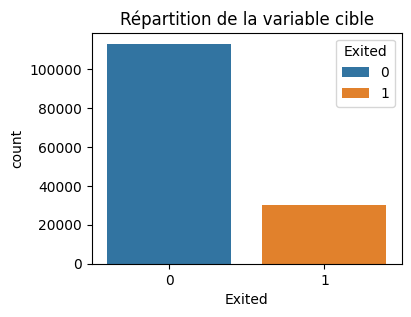

In [6]:
plt.figure(figsize=(4,3))
plt.title('Répartition de la variable cible')
sns.countplot(data=df, x='Exited', hue='Exited')
plt.show()

**Observations:** 

- Une majorité de client n´ont pas résilié.

- La répartition de la variable target est déséquilibré.

## 1.2 Analyse de la variable CustomerID

In [39]:
nr_entree_client = df.CustomerId.value_counts().value_counts()
nr_entree_client.describe(percentiles=[.1, 0.2, .25, .5, .75, .99, 1])

count      76.000000
mean      289.697368
std      1063.694242
min         1.000000
10%         1.500000
20%         3.000000
25%         4.750000
50%        25.500000
75%       209.000000
99%      4289.500000
100%     8821.000000
max      8821.000000
Name: count, dtype: float64

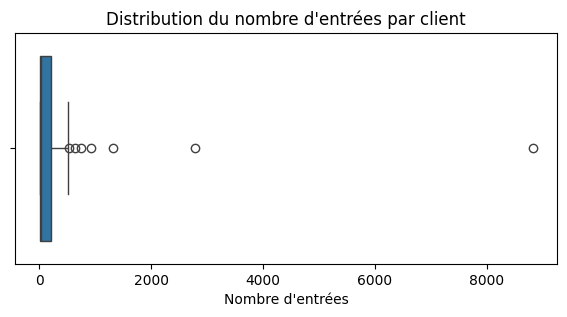

In [31]:
nr_entree_client = df.CustomerId.value_counts().value_counts()
plt.figure(figsize=(7, 3))
sns.boxplot(x=nr_entree_client)
plt.title('Distribution du nombre d\'entrées par client')
plt.xlabel('Nombre d\'entrées')
plt.show()

**Observations:**
* Moins de 10% des clients n´ont qu´une seule entrée dans les données.
* Un unique client est représenté 30 fois plus que la moyenne des clients.
* Un autre client est représenté 2 fois moins que le client le plus représenté.
* En moyenne un client est représenté 289 fois avec un écart type de 1063.

## 1.3

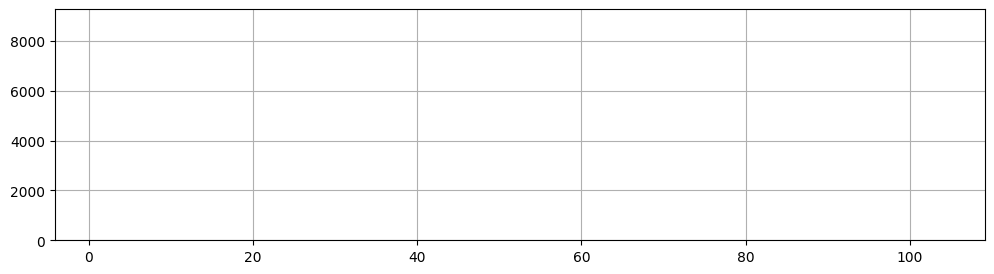

In [12]:
plt.figure(figsize=(12,3))
df.CustomerId.value_counts().hist(bins=len(df.CustomerId.unique()))
plt.show()

**Observations:** Il y a 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


**Idées:**
* Il serait intéressant d´observer si le nombre d´entrée d´un client dans la base de donnée influence sur la variable target